In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("placement.csv")

In [4]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [5]:
df.shape

(200, 2)

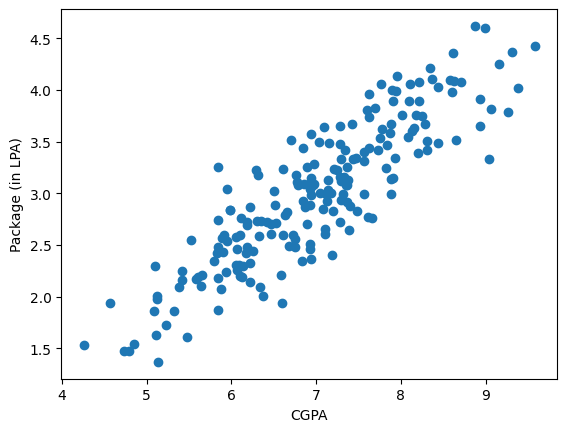

In [15]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package (in LPA)')
plt.show()

In [16]:
#choosing input and output columns 
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [18]:
X.head()

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94


In [19]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y ,test_size=0.2 , random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(X_train , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


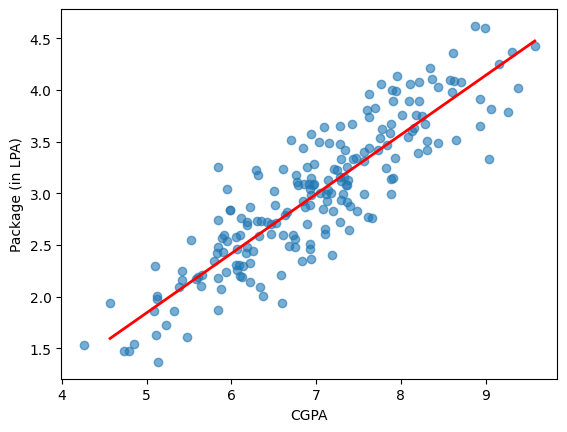

In [31]:
import pandas as pd
import numpy as np

X_line = np.sort(X_train.iloc[:, 0].values)
X_line_df = pd.DataFrame(X_line, columns=X_train.columns)
y_line = lr.predict(X_line_df)
plt.scatter(df['cgpa'], df['package'], alpha=0.6)
plt.plot(X_line, y_line, color='red', linewidth=2)
plt.xlabel('CGPA')
plt.ylabel('Package (in LPA)')
plt.show()


In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [32]:
y_pred = lr.predict(X_test)

In [33]:
y_test.values

array([2.79, 3.23, 3.26, 3.04, 3.34, 4.21, 2.94, 2.87, 2.99, 3.58, 1.63,
       2.08, 4.08, 2.21, 3.47, 3.64, 2.74, 3.08, 2.17, 2.99, 2.31, 2.35,
       3.4 , 3.08, 3.81, 2.19, 1.53, 2.89, 3.16, 2.48, 3.51, 2.98, 3.39,
       3.28, 2.73, 3.74, 2.6 , 3.13, 3.82, 3.15])

In [36]:
print("MAE =",mean_absolute_error(y_test,y_pred))

MAE = 0.23150985393278373


In [42]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.08417638361329656


In [41]:
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE 0.2901316659954521


In [43]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.7730984312051673


In [44]:
n = X_test.shape[0]        # number of samples
p = X_test.shape[1]        # number of features

adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R2:", adj_r2)

Adjusted R2: 0.7671273372895138


## adding more features

In [46]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.775261,3.26
1,5.12,0.537281,1.98
2,7.82,0.686957,3.25
3,7.42,0.085199,3.67
4,6.94,0.968066,3.57


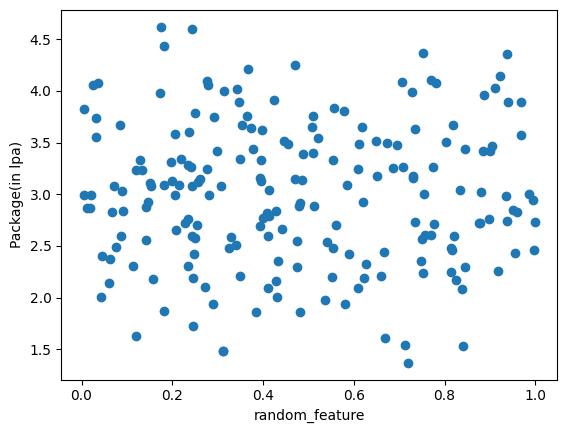

In [48]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')
plt.show()

In [49]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [51]:
lr = LinearRegression()

lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [52]:
y_pred = lr.predict(X_test)

In [53]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7680133098376344


In [55]:
X_test.shape

(40, 2)

In [56]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7554734887477768

### adding relevant feature [iq]

In [57]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [58]:
new_df2.sample(5)

,cgpa,iq,package
96,7.11,2.91,2.61
6,6.73,1.60,2.60
124,6.06,2.21,2.31
178,8.15,4.33,3.63
88,4.73,0.28,1.48


Text(0, 0.5, 'Package(in lpa)')

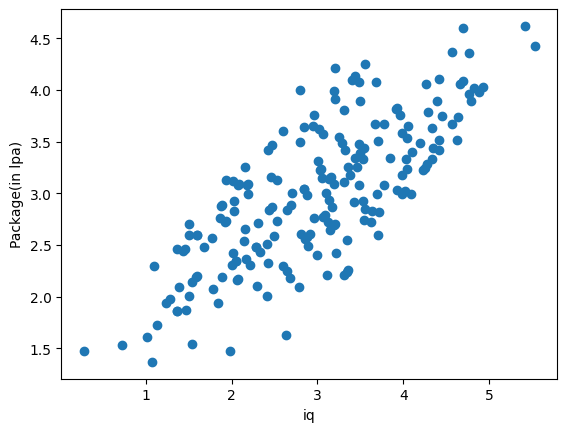

In [59]:

plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [61]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [63]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [64]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8137167625033437


In [66]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8036473983143353

| Metric      | Adds Feature   | Result                  |
| ----------- | -------------- | ----------------------- |
| R²          | Always         | Increases or stays same |
| Adjusted R² | Only if useful | Increases               |
| Adjusted R² | If useless     | Decreases               |
